Import the data :

mongoimport --type csv -d energy_data -c renewables --headerline --drop MER_T10_01.csv

In [27]:
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [29]:
# confirm that our new database was created
print(mongo.list_database_names())

['admin', 'classDB', 'classroom', 'config', 'energy_data', 'epa', 'fruits_db', 'gardenDB', 'local', 'marketing', 'met', 'petsitly_marketing', 'travel_db', 'uk_food']


In [30]:
# assign the database to a variable name
db = mongo['energy_data']
db_state = mongo['state_data']

In [6]:
# review the collections in thedatabase
print(db.list_collection_names())

['hydropower_energy', 'renewables', 'geothermal_energy', 'biomass_energy', 'wind_energy']


In [7]:
# review a document in the collection
print(db.renewables.find_one())

{'_id': ObjectId('65b31de20b15234087b11f34'), 'MSN': 'WDPRBUS', 'YYYYMM': 195113, 'Value': 1534.669, 'Column_Order': 1, 'Description': 'Wood Energy Production', 'Unit': 'Trillion Btu'}


In [8]:
# assign the collection to a variable
renewables = db['renewables']

In [9]:
solar_energy = 'solar_energy_consump2.csv'
solar_df = pd.read_csv(solar_energy)
solar_df

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,0,0,0,0,0,0,0,0,2,...,3,3,3,3,14,20,28,40,62,112
1,AL,113,97,82,68,54,53,62,63,64,...,77,98,100,101,431,"1,811","3,423","3,625","3,437","4,608"
2,AR,795,642,500,367,239,90,94,53,53,...,98,108,111,124,372,442,"2,116","2,254","3,209","5,649"
3,AZ,"3,344","3,086","2,876","2,759","2,671","2,573","2,659","2,746","3,104",...,"17,784","31,499","43,562","48,205","52,832","66,282","70,733","73,207","80,075","92,557"
4,CA,"23,023","22,898","22,346","21,773","22,114","21,962","23,127","25,519","29,543",...,"52,660","85,168","156,446","211,736","267,428","340,183","381,368","405,353","436,394","502,419"
5,CO,221,211,205,199,193,206,232,307,798,...,"3,782","5,214","6,045","6,267","9,505","13,966","15,326","16,769","19,618","24,935"
6,CT,260,302,365,402,454,555,654,771,919,...,"1,273","1,610","2,239","2,951","4,127","5,084","6,476","7,539","9,290","10,962"
7,DC,2,2,3,3,4,5,13,13,18,...,223,257,292,304,295,481,650,920,"1,152","1,470"
8,DE,20,17,15,13,11,11,20,42,48,...,584,"1,009","1,189","1,229","1,133","1,353","1,491","1,627","1,641","1,773"
9,FL,"27,909","26,770","25,656","24,706","23,957","22,915","22,985","23,160","23,613",...,"27,410","28,437","29,755","30,133","30,842","38,184","53,322","68,295","94,430","122,906"


C:\Users\admin\AppData\Local\Temp\ipykernel_14616\3446810250.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['State'].map(states)
C:\Users\admin\AppData\Local\Temp\ipykernel_14616\3446810250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)


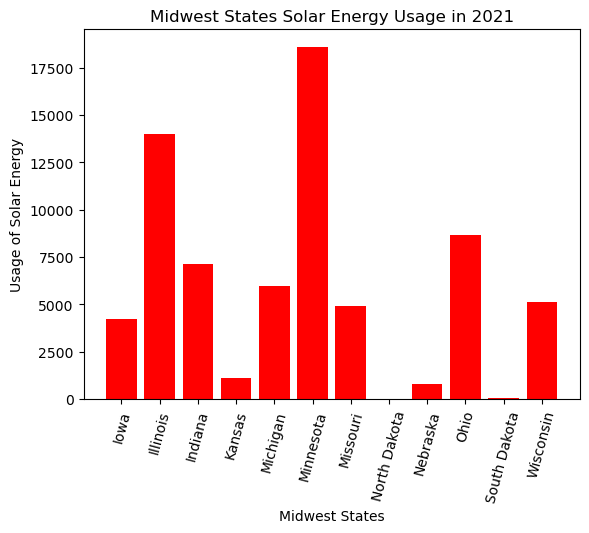

In [79]:
states = {
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'NE': 'Nebraska', 
    'ND': 'North Dakota', 'OH': 'Ohio', 'SD': 'South Dakota', 
    'WI': 'Wisconsin'
}

df_filtered = solar_df[solar_df['State'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
df_filtered['State'] = df_filtered['State'].map(states)
df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)
df_2021 = df_filtered[['State', '2021']]
plt.bar(df_2021['State'], df_2021['2021'], color="red")


plt.xticks(rotation=75)
plt.title("Midwest States Solar Energy Usage in 2021")
plt.xlabel("Midwest States")
plt.ylabel("Usage of Solar Energy")
plt.show()

In [62]:
wind_energy = 'wind_energy_consump2.csv'
wind_df = pd.read_csv(wind_energy)
wind_df

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,0,10,0,0,0,6,8,10,1,...,356,"1,386","1,445","1,487","1,562","1,305","1,410","1,269","1,127","1,169"
1,AL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AZ,0,0,0,0,0,0,0,0,0,...,"5,059","4,291","4,451","4,210","4,998","5,248","4,824","4,933","5,647","14,153"
4,CA,"35,887","36,163","38,684","39,441","43,128","42,618","48,433","55,201","53,063",...,"92,821","122,335","123,546","113,906","124,661","118,074","127,590","122,228","119,083","134,225"
5,CO,0,503,"1,414","1,489","2,205","7,762","8,585","12,765","31,738",...,"56,798","68,731","70,068","69,625","86,939","85,769","88,661","96,575","117,357","133,772"
6,CT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,118,117,112,109,107,113
7,DC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,DE,0,0,0,0,0,0,0,0,0,...,35,43,48,48,49,46,47,47,45,43
9,FL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\admin\AppData\Local\Temp\ipykernel_14616\1082958612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['State'].map(states)
C:\Users\admin\AppData\Local\Temp\ipykernel_14616\1082958612.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)


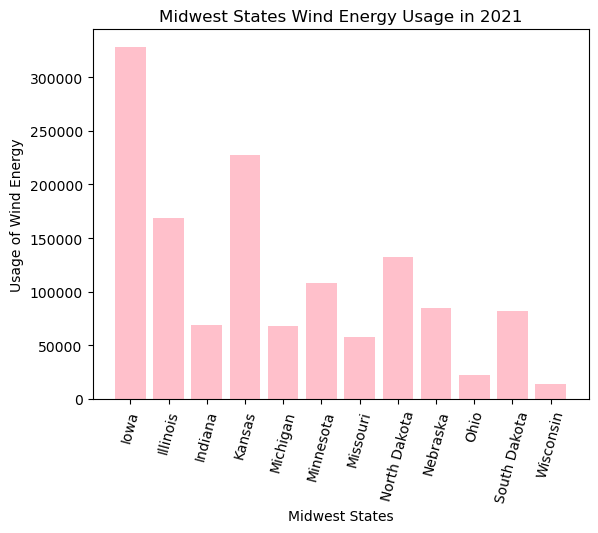

In [80]:
states = {
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'NE': 'Nebraska', 
    'ND': 'North Dakota', 'OH': 'Ohio', 'SD': 'South Dakota', 
    'WI': 'Wisconsin'
}

df_filtered = wind_df[wind_df['State'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
df_filtered['State'] = df_filtered['State'].map(states)
df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)
df_2021 = df_filtered[['State', '2021']]
plt.bar(df_2021['State'], df_2021['2021'], color="pink")


plt.xticks(rotation=75) 
plt.title("Midwest States Wind Energy Usage in 2021")
plt.xlabel("Midwest States")
plt.ylabel("Usage of Wind Energy")
plt.show()

In [81]:
hydropower_energy = 'hydropower_energy_consump2.csv'
hydropower_df = pd.read_csv(hydropower_energy)
hydropower_df

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,"10,220","13,905","14,643","16,023","15,004","14,638","12,137","12,762","11,547",...,"14,988","13,696","14,632","14,613","15,311","15,135","15,141","14,446","15,465","14,937"
1,AL,"59,346","86,346","89,775","128,232","106,432","101,436","71,930","40,881","60,466",...,"70,754","123,071","90,020","91,853","64,456","85,057","101,380","101,495","117,032","101,890"
2,AR,"24,181","26,331","34,953","26,878","36,493","30,822","15,380","31,992","45,923",...,"20,921","25,329","25,102","33,243","32,944","27,102","27,374","36,795","39,720","35,630"
3,AZ,"85,221","78,774","75,557","71,634","69,843","64,094","67,379","65,211","71,795",...,"63,918","56,432","58,179","60,874","66,144","62,908","63,524","55,213","56,316","52,824"
4,CA,"391,043","263,923","316,794","368,253","341,956","396,279","476,582","270,107","237,755",...,"255,384","226,643","157,197","128,612","267,078","390,080","239,556","341,319","187,416","129,809"
5,CO,"14,836","15,445","12,299","12,780","11,966","14,152","17,767","17,095","20,096",...,"14,247","11,572","16,829","15,090","17,557","17,470","16,607","16,116","14,628","14,135"
6,CT,"5,369","2,959","3,409","5,715","4,634","4,782","5,395","3,590","5,481",...,"2,970","3,835","4,127","2,817","2,068","3,059","5,052","3,808","2,858","4,224"
7,DC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,DE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FL,885,"1,526","1,873","2,660","2,657","2,661","2,018","1,527","2,031",...,"1,432","2,425","2,010","2,275","1,611","2,010","2,116","1,868","2,031","2,225"


C:\Users\admin\AppData\Local\Temp\ipykernel_14616\1341268592.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['State'].map(states)
C:\Users\admin\AppData\Local\Temp\ipykernel_14616\1341268592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)


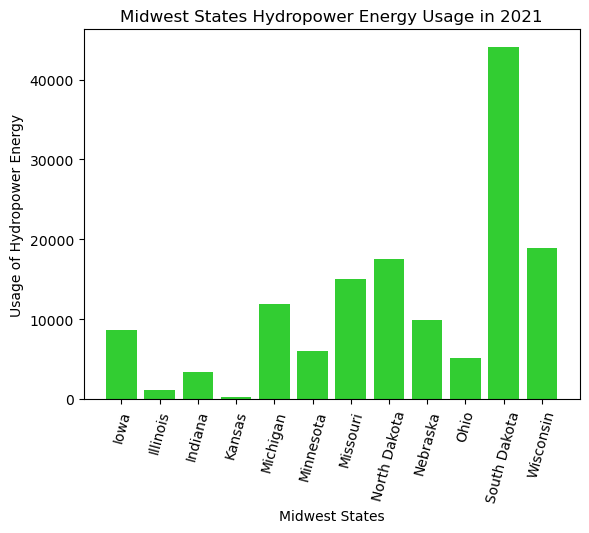

In [82]:
states = {
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'NE': 'Nebraska', 
    'ND': 'North Dakota', 'OH': 'Ohio', 'SD': 'South Dakota', 
    'WI': 'Wisconsin'
}

df_filtered = hydropower_df[hydropower_df['State'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
df_filtered['State'] = df_filtered['State'].map(states)
df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)
df_2021 = df_filtered[['State', '2021']]
plt.bar(df_2021['State'], df_2021['2021'], color="limegreen")


plt.xticks(rotation=75)
plt.title("Midwest States Hydropower Energy Usage in 2021")
plt.xlabel("Midwest States")
plt.ylabel("Usage of Hydropower Energy")
plt.show()

In [83]:
biomass_energy = 'biomass_energy_consump2.csv'
biomass_df = pd.read_csv(biomass_energy)
biomass_df

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,"2,069","3,445","3,540","3,494","3,783","1,197","1,249","1,426","1,447",...,"2,298","3,660","6,494","7,530","9,181","7,802","8,231","7,668","8,687","8,503"
1,AL,"203,782","166,334","163,686","156,371","186,726","178,417","194,853","188,449","177,209",...,"194,992","213,553","203,628","192,270","194,485","198,072","196,226","193,284","187,599","196,574"
2,AR,"83,466","66,837","72,972","80,406","75,933","81,477","84,758","89,239","79,760",...,"103,550","106,124","105,604","95,088","93,707","93,283","94,536","92,332","74,385","72,036"
3,AZ,"13,376","10,389","9,319","9,573","9,704","25,335","25,421","29,420","36,719",...,"27,209","27,187","33,300","35,397","37,709","37,953","40,107","40,871","35,235","37,237"
4,CA,"164,105","164,137","171,500","205,815","228,444","226,206","220,116","225,983","230,785",...,"296,354","343,657","349,289","344,065","349,253","357,861","357,070","405,324","400,214","467,144"
5,CO,"16,364","13,734","12,544","13,788","14,174","12,834","15,042","19,828","24,008",...,"32,766","36,671","37,476","41,942","44,116","44,071","44,599","47,803","41,829","42,466"
6,CT,"45,279","26,652","24,833","26,849","37,870","23,826","29,631","31,798","30,039",...,"34,711","37,487","39,085","40,975","41,535","38,478","37,912","37,386","34,502","36,473"
7,DC,"1,352",864,878,923,939,258,606,728,545,...,832,900,999,"1,506","1,876","1,754","1,989","2,108","1,850","1,866"
8,DE,"2,181","1,208","1,190","1,247","1,271","1,699","3,394","4,683","5,444",...,"6,068","6,137","6,397","6,037","5,985","6,083","6,067","6,441","5,605","5,890"
9,FL,"164,155","127,398","144,188","157,615","149,032","157,664","162,048","169,327","210,030",...,"248,455","260,909","256,189","251,293","247,497","256,365","249,306","235,146","209,583","218,337"


C:\Users\admin\AppData\Local\Temp\ipykernel_14616\1145962199.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['State'].map(states)
C:\Users\admin\AppData\Local\Temp\ipykernel_14616\1145962199.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)


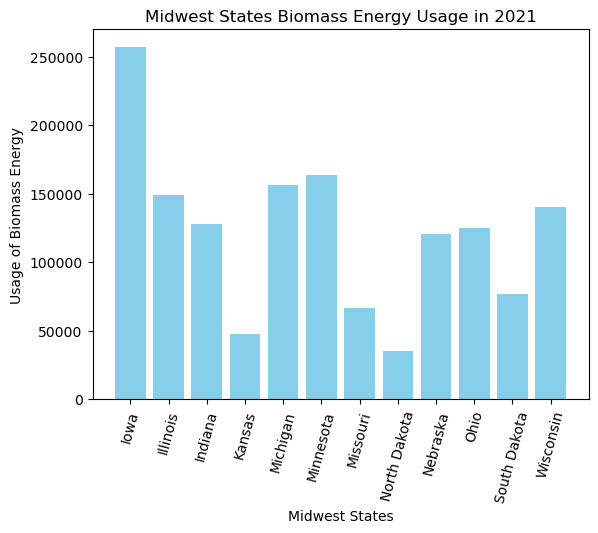

In [84]:
states = {
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'NE': 'Nebraska', 
    'ND': 'North Dakota', 'OH': 'Ohio', 'SD': 'South Dakota', 
    'WI': 'Wisconsin'
}

df_filtered = biomass_df[biomass_df['State'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
df_filtered['State'] = df_filtered['State'].map(states)
df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)
df_2021 = df_filtered[['State', '2021']]
plt.bar(df_2021['State'], df_2021['2021'], color="skyblue")


plt.xticks(rotation=75)
plt.title("Midwest States Biomass Energy Usage in 2021")
plt.xlabel("Midwest States")
plt.ylabel("Usage of Biomass Energy")
plt.show()

In [85]:
geothermal_energy = 'geothermal_energy_consump2.csv'
geothermal_df = pd.read_csv(geothermal_energy)
geothermal_df

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AK,86,86,86,89,88,90,87,87,130,...,186,186,186,186,186,186,186,186,186,186
1,AL,62,65,67,62,68,78,85,98,117,...,141,141,141,141,141,141,141,141,141,141
2,AR,192,212,228,282,306,349,401,482,572,...,808,808,808,808,808,808,808,808,808,808
3,AZ,286,287,294,235,255,283,287,302,366,...,345,345,345,345,345,345,345,345,345,345
4,CA,"127,600","128,077","135,221","133,310","133,248","132,375","129,319","130,592","129,143",...,"121,269","119,556","117,214","112,818","107,867","108,579","108,375","99,263","101,789","100,551"
5,CO,578,579,582,538,562,605,603,621,702,...,759,759,759,759,759,759,759,759,759,759
6,CT,5,5,5,7,7,8,9,11,14,...,21,21,21,21,21,21,21,21,21,21
7,DC,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
8,DE,89,100,109,142,154,176,204,247,294,...,430,430,430,430,430,430,430,430,430,430
9,FL,"2,157","2,444","2,663","3,507","3,849","4,434","5,034","5,908","6,889",...,"10,056","10,056","10,056","10,056","10,056","10,056","10,056","10,056","10,056","10,056"


C:\Users\admin\AppData\Local\Temp\ipykernel_14616\4122242048.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['State'] = df_filtered['State'].map(states)
C:\Users\admin\AppData\Local\Temp\ipykernel_14616\4122242048.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)


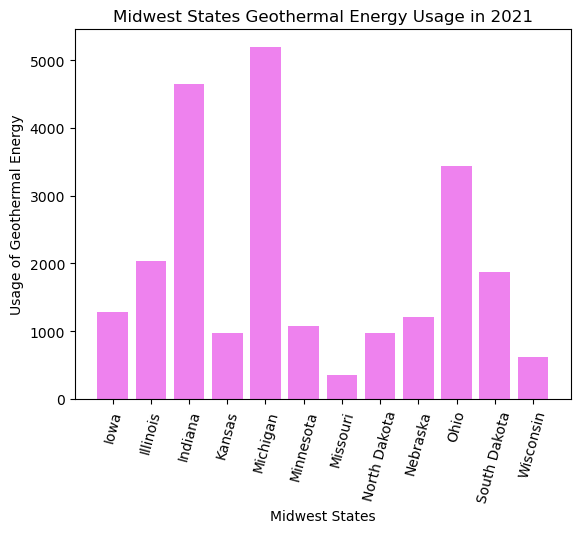

In [86]:
states = {
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'NE': 'Nebraska', 
    'ND': 'North Dakota', 'OH': 'Ohio', 'SD': 'South Dakota', 
    'WI': 'Wisconsin'
}

df_filtered = geothermal_df[geothermal_df['State'].isin(['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'])]
df_filtered['State'] = df_filtered['State'].map(states)
df_filtered['2021'] = df_filtered['2021'].str.replace(',','').astype(int)
df_2021 = df_filtered[['State', '2021']]
plt.bar(df_2021['State'], df_2021['2021'], color="violet")


plt.xticks(rotation=75)
plt.title("Midwest States Geothermal Energy Usage in 2021")
plt.xlabel("Midwest States")
plt.ylabel("Usage of Geothermal Energy")
plt.show()